Hola **Jesus**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

### Como primer paso, se importaron las librerias aquí

In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Se uso el archivo games para el proyecto

In [48]:
df_games = pd.read_csv('/datasets/games.csv')

In [49]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [50]:
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Se pusieron los nombres de las columnas en minusculas

In [51]:
df_games.columns = df_games.columns.str.lower()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho el ajuste del nombre de las columnas, trabajar con columnas en snake_case te permite seguir los estándares de Python y acceder de mejor manera a los datos
</div>

### Convertir los datos en tipos de necesarios, lo que observo es que hay que transformar year_of_release en entero, user_score en float debido a que es un valor numerico con decimales, así como year of release es un dato numerico entero

#### year_of_release

In [52]:
# Convertir la columna a tipo entero
df_games['year_of_release'] = pd.to_numeric(df_games['year_of_release'], errors='coerce').fillna(0).astype(int)

In [53]:
df_games['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000,    0, 1995,
       1991, 1981, 1987, 1980, 1983])

#### user_score

In [54]:
df_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [55]:
df_games[df_games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [56]:
# Reemplazar 'tbd' por NaN
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan)

In [57]:
df_games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

##### Reemplazaré tanto el valor nan como el tbd con la mediana de los datos, ya que ponerles un valor de 0 afectaría en las estadisticas de los datos

In [58]:
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

In [59]:
print('La media de user_score es', df_games['user_score'].mean())
print('La mediana de user_score es', df_games['user_score'].median())

La media de user_score es 7.125046113306982
La mediana de user_score es 7.5


Se optará por usar la mediana, aunque la media no esta muy alejada de la mediana por lo que es criterio propio

Considero que los valores ausentes y los tbd en user_score es debido a que no se ha hecho una critica por parte de los usuarios, o que no se ha proporcionado una encuesta para estos videojuegos, lo que observo es que muchos de ellos son juegos poco conocidos o con ventas no tan grandes, en los años 

In [60]:
df_games['user_score'] = df_games['user_score'].fillna(df_games['user_score'].median())

Ahora los datos se ven más correctos

In [61]:
df_games.info()
df_games.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,7.5,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.5,NaN


Observe tambien que hay dos columnas donde no hay nombre del juego, ni genero ni criticas ni rating por lo que considero que son valores que no nos van a servir 

In [62]:
df_games[df_games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,7.5,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,7.5,NaN


In [63]:
df_games = df_games.dropna(subset=['name'])

In [64]:
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [65]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales'] 

In [66]:
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')

In [67]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,7.5,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.5,NaN,31.38


Agrupamos los juegos por años para ver la distribucion por periodo

In [68]:
qty_games_per_year = df_games.groupby('year_of_release')['year_of_release'].count().reset_index(name='count')
print(qty_games_per_year)

    year_of_release  count
0                 0    269
1              1980      9
2              1981     46
3              1982     36
4              1983     17
5              1984     14
6              1985     14
7              1986     21
8              1987     16
9              1988     15
10             1989     17
11             1990     16
12             1991     41
13             1992     43
14             1993     60
15             1994    121
16             1995    219
17             1996    263
18             1997    289
19             1998    379
20             1999    338
21             2000    350
22             2001    482
23             2002    829
24             2003    775
25             2004    762
26             2005    939
27             2006   1006
28             2007   1197
29             2008   1427
30             2009   1426
31             2010   1255
32             2011   1136
33             2012    653
34             2013    544
35             2014    581
3

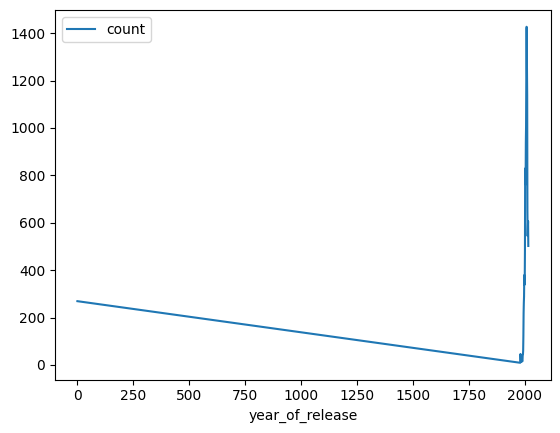

In [69]:
qty_games_per_year.sort_values('year_of_release').plot(x='year_of_release', y='count')
plt.show()

Veo que los datos de años pasados, es muy poca comparado con los años más recientes, esto es muy probable a que no habia tantos recursos ni facilidades para recabar la informacion aparte de que no había tanta variedad de juegos ya que era un sector en vías de desarrollo.

A su vez, observo que hay 269 valores que no tienen el dato de año, como el valor se utilizar para agrupar, y ver tendencias por periodo, procedere a eliminarlos por que me van a afectar en el análisis, no es un gran numero del total por lo que considero que no afectara considerablemente.

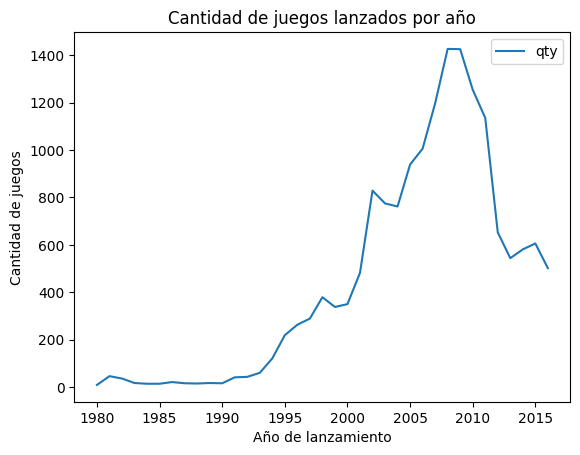

In [70]:
qty_games_per_year = df_games.query("year_of_release != 0")
qty_games_per_year = qty_games_per_year.groupby('year_of_release')['year_of_release'].count().reset_index(name='count')

qty_games_per_year.sort_values('year_of_release').plot(x='year_of_release', y='count', label='qty',
                                                       xlabel = 'Año de lanzamiento',
                                                       ylabel = 'Cantidad de juegos',
                                                       title = 'Cantidad de juegos lanzados por año'
                                                      )
plt.show()

Ahora esta es la tendencia de la cantidad de videjuegos a traves de los años omitiendo los años nulos

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el cálculo! Sin embargo, para mejorar la presentación del análisis deberías mostrar una gráfica aquí, de preferencia de líneas para poder identificar tendencias en el pasar de los años
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

Se añadió lo solicitado, se observa de forma gráfica y visual la importancia de haber omitido los datos sin número de año de lanzamiento, podemos observar como esta cantidad arruinaba el análisis que podemos darle a los datos si queremos ver una historia cronológica del recuento de los videojuegos lanzados por un periodo de tiempo
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Muy bien! Siempre que tengas resultados numéricos con varias muestras lo mejor es llevarlo a algo gráfico ya que es más sencillo de comprender
</div>

In [71]:
df_games = df_games[df_games['year_of_release'] != 0]

In [72]:
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,7.5,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,7.5,NaN,31.38


In [73]:
gp_games = df_games.groupby('platform')['total_sales'].sum().reset_index()

In [74]:
gp_games = gp_games.sort_values('total_sales',ascending = False)

In [75]:
print(gp_games)

   platform  total_sales
16      PS2      1233.56
28     X360       961.24
17      PS3       931.34
26      Wii       891.18
4        DS       802.78
15       PS       727.58
18      PS4       314.14
6       GBA       312.88
19      PSP       289.53
2       3DS       257.81
13       PC       255.76
5        GB       254.43
29       XB       251.57
11      NES       251.05
10      N64       218.01
23     SNES       200.04
7        GC       196.73
30     XOne       159.32
0      2600        86.48
27     WiiU        82.19
20      PSV        53.81
21      SAT        33.59
8       GEN        28.35
3        DC        15.95
22      SCD         1.86
12       NG         1.44
25       WS         1.42
24     TG16         0.16
1       3DO         0.10
9        GG         0.04
14     PCFX         0.03


In [76]:
top10_plat = gp_games.head(10)
top10_plat = top10_plat['platform'].unique()

In [77]:
top10_plat

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS'], dtype=object)

Estas son las consolas que más han vendido a lo largo de los años

In [78]:
gp_games = df_games.query("platform in @top10_plat").groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()

In [79]:
gp_games = gp_games.sort_values(by = ['platform','year_of_release'])

In [80]:
gp_games.head(20)

,year_of_release,platform,total_sales
60,2011,3DS,63.20
67,2012,3DS,51.36
73,2013,3DS,56.57
80,2014,3DS,43.76
86,2015,3DS,27.78
92,2016,3DS,15.14
0,1985,DS,0.02
19,2004,DS,17.27
23,2005,DS,130.14
28,2006,DS,119.81


In [81]:
df_games[(df_games['year_of_release'] == 1985) & (df_games['platform'] == 'DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,7.5,NaN,0.02


Hay un valor que me llamó la atención, la plataforma DS tiene un juego lanzado en 1985, esto no tiene sentido ya que la plataforma DS se lanzó en 2004.

Hice una busqueda de dicho juego y este se lanzó en 2007. Consideré modificarlo.

In [82]:
df_games.loc[(df_games['year_of_release'] == 1985) & (df_games['platform'] == 'DS'), 'year_of_release'] = 2007

In [83]:
df_games[df_games['name'] == 'Strongest Tokyo University Shogi DS']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,2007,Action,0.0,0.0,0.02,0.0,NaN,7.5,NaN,0.02


In [84]:
gp_games = df_games.query("platform in @top10_plat").groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()
gp_games = gp_games.sort_values(by = ['platform','year_of_release'])
print(gp_games.head(30))

    year_of_release platform  total_sales
59             2011      3DS        63.20
66             2012      3DS        51.36
72             2013      3DS        56.57
79             2014      3DS        43.76
85             2015      3DS        27.78
91             2016      3DS        15.14
18             2004       DS        17.27
22             2005       DS       130.14
27             2006       DS       119.81
34             2007       DS       146.96
41             2008       DS       145.31
47             2009       DS       119.54
53             2010       DS        85.02
60             2011       DS        26.18
67             2012       DS        11.01
73             2013       DS         1.54
6              2000      GBA         0.07
9              2001      GBA        61.53
12             2002      GBA        74.16
15             2003      GBA        56.67
19             2004      GBA        77.91
23             2005      GBA        33.86
28             2006      GBA      

In [85]:
df_games_grouped = gp_games.pivot_table(index="year_of_release", columns="platform", values="total_sales")

df_games_grouped.head()

platform,3DS,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1994,NaN,NaN,NaN,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,169.49,NaN,NaN,NaN,NaN,NaN,NaN


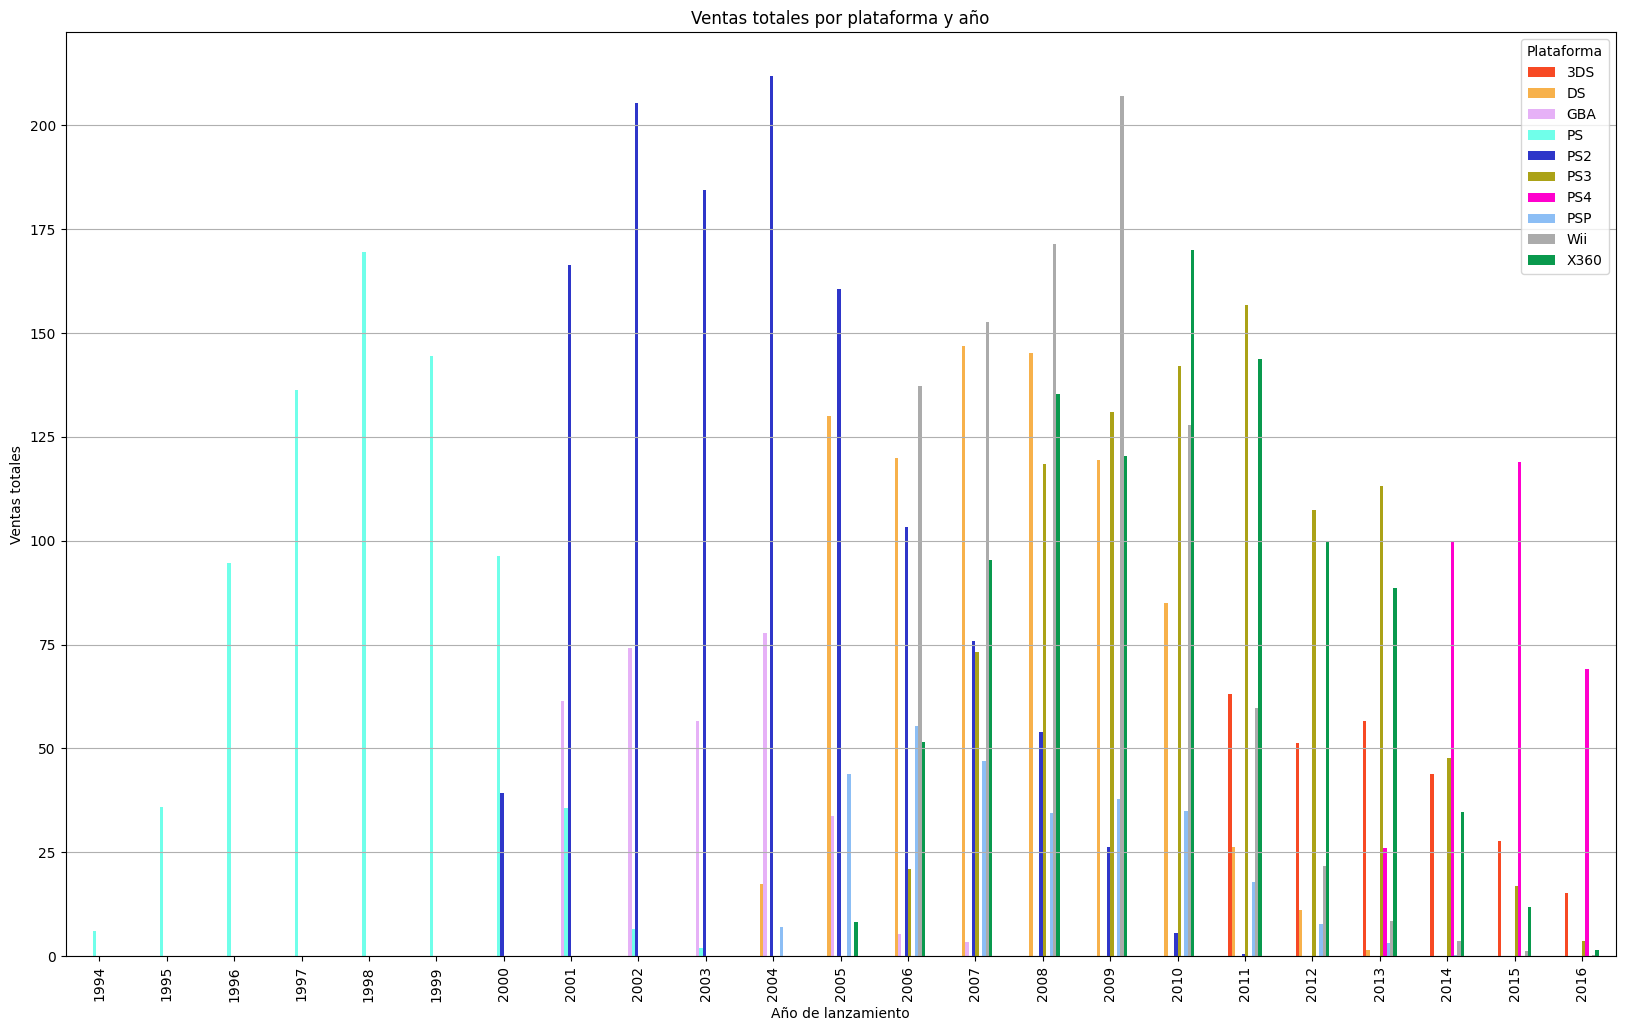

In [91]:
platform_colors = {
    "3DS": "#f74924", ##rojo
    "DS": "#f7b14b", #naranja
    "GBA": "#e6b1f7", #rosa
    "Wii": "#ababab", #gris
    "PS": "#70ffea", #cian
    "PS2": "#2e36c9", #azul
    "PS3": "#aba217", #dorado
    "PS4": "#ff00cd", #magenta
    "PSP": "#8cbef5", #celeste,
    "X360": "#09994d" #verde
}

df_games_grouped.plot(kind="bar", figsize=(20, 12), color=[platform_colors.get(p, "gray") for p in df_games_grouped.columns])
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas totales")
plt.title("Ventas totales por plataforma y año")
plt.legend(title="Plataforma")
plt.grid(axis="y")

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Mostrar sólo resultados numéricos vuelve complejo el entender el análisis o resultado de tus cálculos, en esta sección procura utilizar más las gráficas para tener resultados más visuales 
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
Con esta gráfica observamos amplio aspecto el comportamiento de las 10 plataformas con más ventas totales a lo largo de periodo seleccionado, podemos observar datos como que la Play Station tuvo ventas en 10 años abarcando desde 1994 hasta el 2004, que la Play Station 2 es la consola que más ha vendido en un año que acontencio en el 2004, y que sus competidores se quedaron muy cortos en ventas de 2002 a 2004.
Si queremos revisar los datos de Xbox 360 podemos observar que tuvo una duracion destacable durando 12 años en el mercado desde 2005 hasta el 2016.

Estos datos que nos pueden servir para tomar decisiones, son más sencillos de sacar con ayuda de las gráficas
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteracion)</b> <a class=“tocSkip”></a>

Correcto, mostrar de manera gráfica reduce la fricción que puedas llegar a tener cuando muestres resultados del análisis con personas que no sean tan técnicas
</div>

In [37]:
print(gp_games['year_of_release'].min())

1994


In [38]:
gp_games = gp_games.groupby(['platform'])['year_of_release'].count().reset_index()
print(gp_games)

  platform  year_of_release
0      3DS                6
1       DS               10
2      GBA                8
3       PS               10
4      PS2               12
5      PS3               11
6      PS4                4
7      PSP               12
8      Wii               11
9     X360               12


In [39]:
print('La media de cantidad de años por plataforma es:',gp_games.mean())
print('La mediana de cantidad de años por plataforma es:',gp_games.median())

La media de cantidad de años por plataforma es: year_of_release    9.6
dtype: float64
La mediana de cantidad de años por plataforma es: year_of_release    10.5
dtype: float64


Tomaré en cuenta la mediana, por lo que podríamos considerar que *las plataformas tienden aproximadamente 10 años y medio en desaparecer*

Agarré un top 10 de plataformas con mayor cantidad de total_sales, donde el año minimo fue el 1994, por lo que considero que a partir de ese año serán los datos relevantes y las plataformas que tomaré en cuenta son las siguientes:

In [40]:
top10_plat

array(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP',
       '3DS'], dtype=object)

In [41]:
df_games_top10plat = df_games.query("platform in @top10_plat")

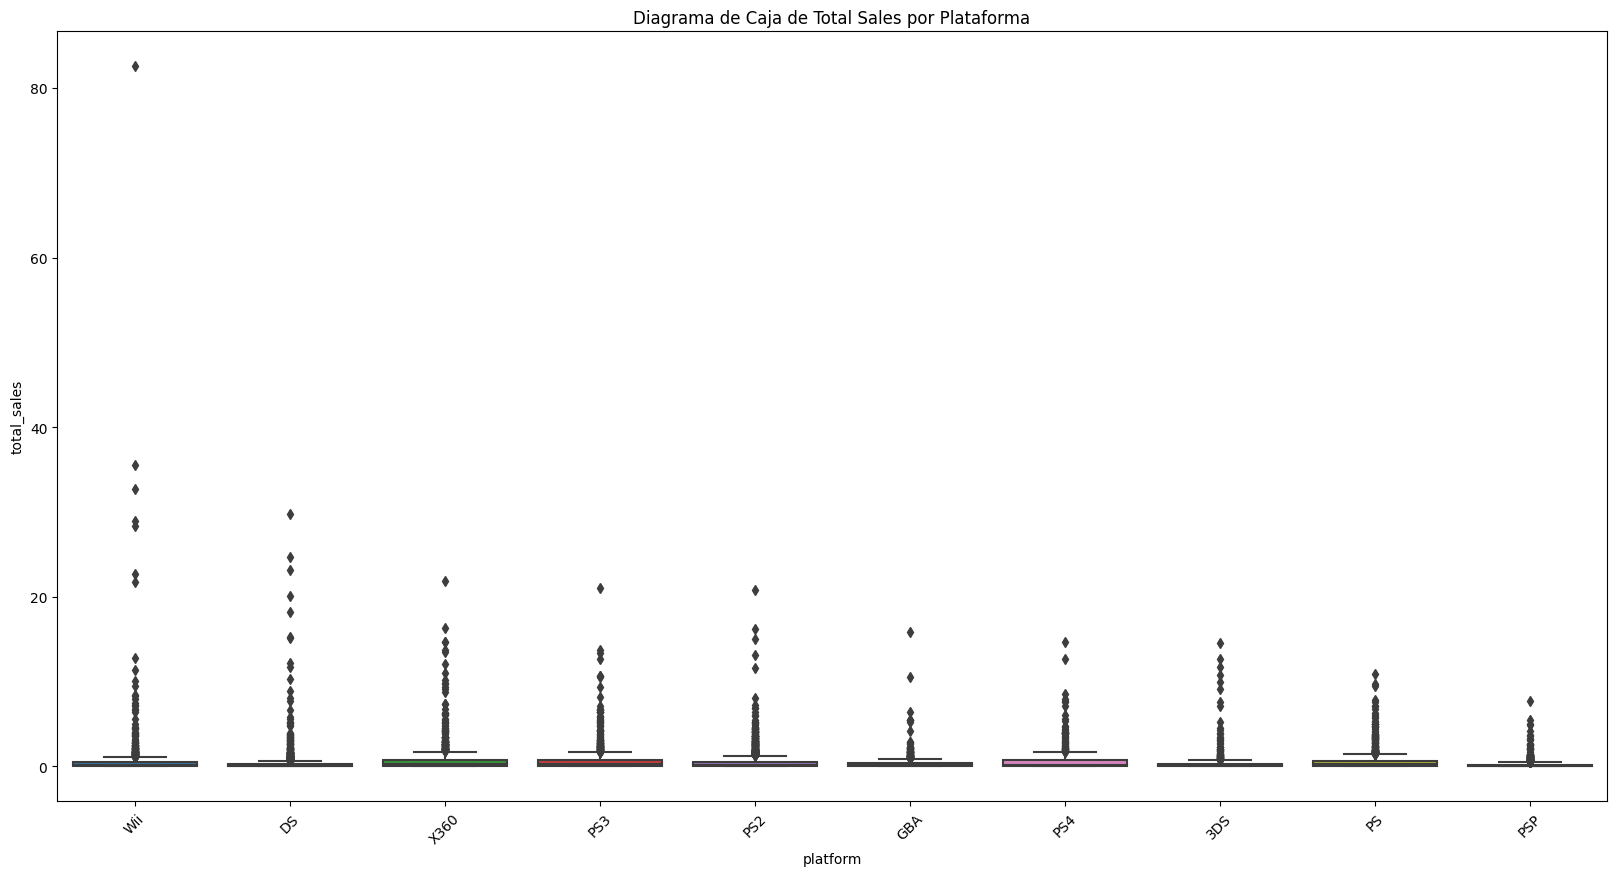

In [42]:
# Crear un diagrama de caja para la columna 'total_sales'
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_games_top10plat, x='platform', y='total_sales')  # Ajusta según tus columnas

plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
plt.title('Diagrama de Caja de Total Sales por Plataforma')
plt.show()

Lo que observo es que todas tienen ventas fuera de su limite, en especial la wii que tiene uno de los juegos más vendidos del mundo que si mal no recuerdo es el Wii Sports, ahí se puede sumar el minecraft en algunas otras plataformas. Las ventas de los videojuegos son muy indeterminables ya que estos valores fuera del rango son ventas record, por lo que es dificil sacar conclusiones con este metodo.

Ahora revisare por reseñas y ver si afectan, primero cambiaré la forma en que las reseñas se ven ya que estan de 1-10 y las de profesionales de 1 a 100, por lo que optaré por multiplicar por 10 el valor

In [43]:
df_games['user_score'] = df_games['user_score'] * 10

In [44]:
df_games['avg_score'] = (df_games['user_score'] + df_games['critic_score']) /2

In [45]:
df_X360 = df_games[df_games['platform'] == 'X360']

In [46]:
df_X360.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,avg_score
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,63.0,E,21.82,62.0
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27,89.0
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,34.0,M,14.73,61.0
32,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87.0,63.0,M,14.62,75.0
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,48.0,M,13.68,65.5


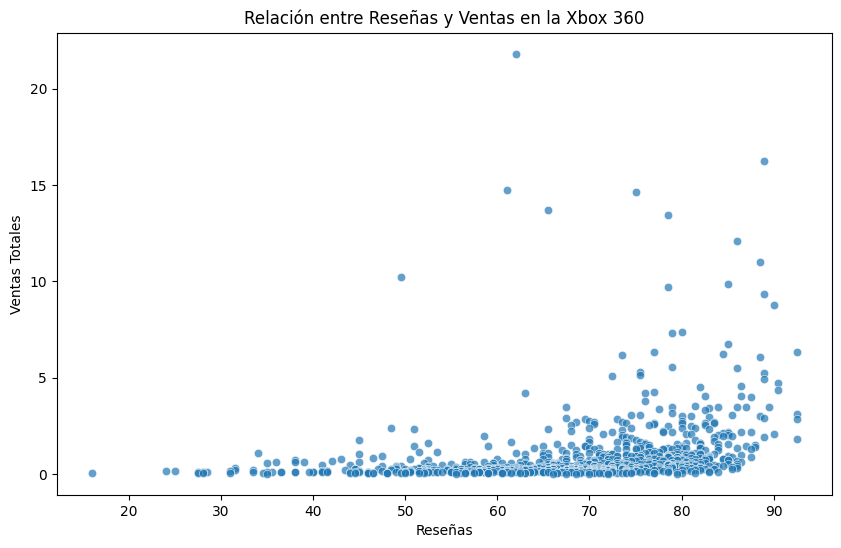

In [47]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_X360, x='avg_score', y='total_sales', alpha=0.7)

# Personalizar etiquetas y título
plt.xlabel('Reseñas')
plt.ylabel('Ventas Totales')
plt.title('Relación entre Reseñas y Ventas en la Xbox 360')

plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con las correlaciones entre las diferentes variables, siempre es importante revisar que puede estar afectando a otro punto del análisis
</div>

In [48]:
print(df_X360[['avg_score','total_sales']].corr())

             avg_score  total_sales
avg_score     1.000000     0.285002
total_sales   0.285002     1.000000


Escogi el Xbox 360 ya que es una consola relativamente reciente a la fecha de donde se tienen los datos de 2016 y es una consola que ya estaba de bajada en esos años, por lo que tiene una informacion más completa y actualizada a esa fecha, lo que observo es que no hay una gran correlacion entre las ventas totales y la puntuacion promedio de las reseñas

In [49]:
df_codII_game = df_games[['name', 'platform', 'na_sales','eu_sales','jp_sales',
                         'other_sales', 'total_sales','critic_score','user_score']]
df_codII_game = df_codII_game[df_codII_game['name'] == 'Call of Duty: Black Ops II']
print(df_codII_game)

                            name platform  na_sales  eu_sales  jp_sales  \
34    Call of Duty: Black Ops II      PS3      4.99      5.73      0.65   
35    Call of Duty: Black Ops II     X360      8.25      4.24      0.07   
1227  Call of Duty: Black Ops II       PC      0.64      0.69      0.00   
4706  Call of Duty: Black Ops II     WiiU      0.20      0.18      0.00   

      other_sales  total_sales  critic_score  user_score  
34           2.42        13.79          83.0        53.0  
35           1.12        13.68          83.0        48.0  
1227         0.19         1.52          74.0        42.0  
4706         0.03         0.41          81.0        69.0  


In [50]:
df_minecraft_game = df_games[['name', 'platform', 'na_sales','eu_sales','jp_sales', 'year_of_release' ,
                         'other_sales', 'total_sales']]
df_minecraft_game = df_minecraft_game[df_minecraft_game['name'] == 'Minecraft']
print(df_minecraft_game)

           name platform  na_sales  eu_sales  jp_sales  year_of_release  \
72    Minecraft     X360      5.70      2.65      0.02             2013   
180   Minecraft      PS3      2.03      2.37      0.00             2014   
261   Minecraft      PS4      1.48      2.02      0.14             2014   
543   Minecraft     XOne      1.61      0.90      0.00             2014   
868   Minecraft      PSV      0.18      0.64      0.90             2014   
2973  Minecraft     WiiU      0.28      0.17      0.18             2016   

      other_sales  total_sales  
72           0.81         9.18  
180          0.87         5.27  
261          0.68         4.32  
543          0.25         2.76  
868          0.24         1.96  
2973         0.04         0.67  


Escogí dos de los juegos más populares que yo conoci en mi infancia, aparte de ser juegos con records en ventas para analizar el comportamiento más fácilmente.

Omiti las columnas que duplican los valores para tener unicamente las variables, en COD II se omitio la fecha de lanzamiento por que el juego salio en todas las plataformas en el mismo año, en el caso de minecraft no se omitio este dato porque el juego salio en 3 años distintos.

En ambos podemos observar que las consolas ps3 y xbox 360 son las predilectas entre los jugadores para 2016 aunque el juego ya llevaba 3 años. PS4 y Xbox One ya tenian una cantidad considerable de ventas con un año menos en el mercado. Mientras que podemos observar que la WiiU en ambas tiene muy pocas ventas siento la plataforma menos popular en el mercado a 2016

In [51]:
gp_games_genre = df_games.query('platform in @top10_plat and year_of_release > 1994')
gp_games_genre = df_games.groupby('genre')['total_sales'].sum().reset_index()
gp_games_genre

,genre,total_sales
0,Action,1716.52
1,Adventure,233.33
2,Fighting,442.66
3,Misc,790.29
4,Platform,825.55
5,Puzzle,239.89
6,Racing,723.49
7,Role-Playing,931.08
8,Shooter,1041.36
9,Simulation,387.96


Podemos observar que los juegos más vendidos son los de accion, aventura, y pelea, son juegos que mantienen el estimulo de entusiasmo y la imaginacion en los videojugadores. Aparte de que son generos que tienen una amplia gama de titulos muy populares.
Podría considerar que los juegos de simulacion, deportes y estrategia son juegos con temáticas más de pensar y analizar lo cual no creo que resulta atractivo en un gran sector de la poblacion de videojugadores que es el sector infantil

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo analizando las ventas por plataforma y por género, tratándose de videojuegos, analizarlo de esta forma da muy buenos detalles en tu análisis
</div>

In [52]:
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales', 'avg_score'],
      dtype='object')

In [53]:
gp_games = df_games.query('year_of_release > 1994 and platform in @top10_plat')

### Regiones

In [54]:
df_games_na = gp_games[['name','platform','genre','na_sales','rating']]
df_games_eu = gp_games[['name','platform','genre','eu_sales','rating']]
df_games_jp = gp_games[['name','platform','genre','jp_sales','rating']]

#### Norteamerica

##### Por plataformas

In [55]:
print(df_games_na.groupby('platform')['na_sales'].sum().reset_index().sort_values('na_sales', ascending = False).head(5))

  platform  na_sales
9     X360    595.74
4      PS2    572.92
8      Wii    486.87
5      PS3    390.13
1       DS    380.31


##### Por genero

In [56]:
print(df_games_na.groupby('genre')['na_sales'].sum().reset_index().sort_values('na_sales', ascending = False).head(5))

      genre  na_sales
0    Action    689.29
10   Sports    552.39
8   Shooter    402.79
3      Misc    349.59
6    Racing    269.56


##### Por clasificacion

In [57]:
print(df_games_na.groupby('rating')['na_sales'].sum().reset_index().sort_values('na_sales', ascending = False).head(5))

  rating  na_sales
0      E   1114.22
4      M    613.09
5      T    598.45
1   E10+    309.69
2     EC      1.35


#### Japón

##### Por plataformas

In [58]:
print(df_games_jp.groupby('platform')['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending = False).head(5))

  platform  jp_sales
1       DS    175.02
4      PS2    137.54
3       PS    137.11
0      3DS    100.62
5      PS3     79.41


##### Por género

In [59]:
print(df_games_jp.groupby('genre')['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending = False).head(5))

           genre  jp_sales
7   Role-Playing    250.45
0         Action    129.24
10        Sports     86.09
3           Misc     82.62
4       Platform     52.39


##### Por clasificación

In [60]:
print(df_games_jp.groupby('rating')['jp_sales'].sum().reset_index().sort_values('jp_sales', ascending = False).head(5))

  rating  jp_sales
0      E    178.92
5      T    136.68
4      M     60.13
1   E10+     36.82
3    K-A      1.46


#### Europa

##### Por plataforma

In [61]:
print(df_games_eu.groupby('platform')['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending = False).head(5))

  platform  eu_sales
4      PS2    332.63
5      PS3    327.21
9     X360    268.32
8      Wii    258.32
3       PS    211.19


##### Por género

In [62]:
print(df_games_eu.groupby('genre')['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending = False).head(5))

      genre  eu_sales
0    Action    434.41
10   Sports    324.54
8   Shooter    245.66
6    Racing    196.74
3      Misc    192.70


##### Por clasificación

In [63]:
print(df_games_eu.groupby('rating')['eu_sales'].sum().reset_index().sort_values('eu_sales', ascending = False).head(5))

  rating  eu_sales
0      E    632.87
4      M    393.66
5      T    330.21
1   E10+    159.74
3    K-A      0.16


#### _Podemos observar que en cuanto a las plataformas, Norteamerica tiene una cantidad más variada de plataformas teniendo a play station, xbox y productos de nintendo en su top 5 mientras que algo curioso es que japón es que en su top 5 se encuentra nintendo y play station los cuales son productos japoneses y en Europa play station domina el mercado, el genero en europa y norteamerica es similar teniendo accion, deportes, dispartos, carreras y misc mientras que en japón las carreras y los disparos son reemplazados por los juegos de plataformas y el rpg_ 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, este análisis es importante, siempre hay que crear perfiles de usuario para entender cómo usan el producto que se está analizando
</div>

### Hipotesis nula-alternativa user_score

#### Xbox One-PC

In [64]:
df_user_score_xb = df_games.query("platform == 'XOne'")
df_user_score_xb = df_user_score_xb['user_score']

df_user_score_pc = df_games.query("platform == 'PC'")
df_user_score_pc = df_user_score_pc['user_score']

In [65]:
alpha = 0.05

results = st.ttest_ind(df_user_score_xb, df_user_score_pc, equal_var = False)

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 4.3968409560033386e-05
Rechazamos la hipótesis nula


*Podemos decir que las calificaciones promedio de los usuarios entre el Xbox One y la PC son totalmente diferentes*

#### Genero Accion-Deportes

In [66]:
df_user_score_action = df_games.query("genre == 'Action'")
df_user_score_action = df_user_score_action['user_score']

df_user_score_sports = df_games.query("genre == 'Sports'")
df_user_score_sports = df_user_score_sports['user_score']

In [67]:
alpha = 0.05

results = st.ttest_ind(df_user_score_action, df_user_score_sports, equal_var = False)

print('valor p:', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p: 0.5696868901880213
No podemos rechazar la hipótesis nula


*No podemos rechazar la hipotesis nula por lo que los promedios de los usuarios podrían ser similares*

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien aplicada las pruebas estadísticas para revisar las diferencias. Es importante comprobar esto de manera matemática para tener una mayor seguridad de que las diferencias vistas no es algo aleatorio.
</div>

### Conclusiones

Se utilizaron varias librerías para el proceso del análisis como lo fue pandas, numpy, matplotlib, seaborn y scipy.

Se estandarizaron primero los nombres de columnas en minúsculas para una mayor facilidad en la manipulación de los dataframes, a su vez se realizaron varias conversiones en columnas como la de _year_of_release_ transformando los datos en numérico, había algunos datos que no tenían año, por lo que se pusieron como 0 haciendo uso del fillna y se reemplazaron los valores de user_score a tipo float y los valores como na y tbd se reemplazaron con la mediana total de la columna.

Se realizo una limpieza eliminando dos columnas que no tenían valores en name, year_of_release, rating ni critic_score y a su vez se creo una columna total_sales que suma las ventas de todas las regiones, esto nos permitió ver a amplio rango las ventas y ver que datos tomar en cuenta, se reviso las ventas totales por año y se observo que habían datos en año 0, lo que nos permitió omitirlos y continuar con los filtros de plataformas y años. En este caso seleccione las 10 plataformas con mayores ventas que a su vez conformaban años que iban desde 1994 hasta el 2016 y se omitieron todos los valores que no tuvieran año.

Observe a su vez que en dichas plataformas había un valor inconsistente debido a que la en la plataforma DS aparecía el año 1985 en un videojuego en especifico, lo cual no era preciso y se modifico por 2007 con una búsqueda que hice. Se realizaron varios diagramas como el de caja para revisar el comportamiento de las ventas por plataformas y un diagrama de dispersión de las reseñas y las ventas de Xbox 360. Finalmente se realizaron hipótesis para analizar si los promedios de calificaciones de usuarios entre la plataforma Xbox One con la PC, y los géneros Acción-deportes son iguales.